# ::::::::::::::::::::::::::::::::::::::ASSIGNMENT 2:::::::::::::::::::::::::::::::::::::::::::::

# Question 1: 
You are given a K-NN code for Apple vs Orange problem. Please read and understand the code. Now perform the
following tasks:
(a) Synthetically increase the dataset size to 50 samples.
(b) Edit the code so that random 80%, 10%, and 10% samples are used for training, testing, and validation respectively.
(c) Change the value of K to 3, 5, and 7 and compare the validation set and test set results.
(d) Write a code that draws confusion matrices for different K.

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Creating Observation Dataset [Redness, Weight, Apple/Orange]:

data = np.array([
    [250, 120, 1],
    [240, 110, 1],
    [245, 130, 1],
    [240, 100, 1],
    [220, 120, 1],
    [230, 125, 1],
    [235, 118, 1],
    [245, 131, 1],
    [15, 130, 1],
    [215, 130, 1],
    [253, 110, 1],
    [235, 120, 1],
    [245, 135, 1],
    [230, 105, 1],
    [225, 130, 1],
    [235, 124, 1],
    [220, 100, 1],
    [245, 130, 1],
    [210, 110, 1],
    [212, 128, 1],
    [235, 122, 1],
    [220, 100, 1],
    [245, 130, 1],
    [210, 110, 1],
    [215, 105, 1],
    [25, 90, -1],
    [30, 92, -1],
    [15, 80, -1],
    [33, 88, -1],
    [18, 87, -1],
    [25, 94, -1],
    [30, 92, -1],
    [15, 80, -1],
    [33, 87, -1],
    [18, 87, -1],
    [25, 85, -1],
    [40, 89, -1],
    [10, 80, -1],
    [25, 90, -1],
    [15, 85, -1],
    [28, 83, -1],
    [35, 96, -1],
    [12, 82, -1],
    [30, 98, -1],
    [20, 85, -1],
    [20, 91, -1],
    [30, 93, -1],
    [14, 84, -1],
    [32, 95, -1],
    [18, 92, -1]
])

## 1--> Apple, -1--> Orange

In [35]:
# separating Dataset based on Features:

X=data[:,:2] ## X-->[Redness & Weight]
y=data[: ,2] ## y-->[Apple or Orange]


In [41]:
## (80-10-10) Training, Test and Validation

# Split dataset into training & temporary sets:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split temporary dataset into validation and testing sets:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [37]:
k_values = [3, 5, 7]

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    
    print(f"Validation Result (k={k})")
    print(f"Features:\n", X_val)
    y_val_pred = knn_classifier.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Predicted Result", y_val_pred)
    print("Accuracy:", val_accuracy)
    
    print(f"\nTest Result (k={k})")
    print(f"Features:\n", X_test)
    y_test_pred = knn_classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Predicted Result", y_test_pred)
    print("Accuracy:", test_accuracy)
    print("\n")

Validation Result (k=3)
Features:
 [[ 25  94]
 [212 128]
 [245 130]
 [ 20  91]
 [ 30  92]]
Predicted Result [-1  1  1 -1 -1]
Accuracy: 1.0

Test Result (k=3)
Features:
 [[ 15  80]
 [ 15  85]
 [ 32  95]
 [230 105]
 [ 25  90]]
Predicted Result [-1 -1 -1  1 -1]
Accuracy: 1.0


Validation Result (k=5)
Features:
 [[ 25  94]
 [212 128]
 [245 130]
 [ 20  91]
 [ 30  92]]
Predicted Result [-1  1  1 -1 -1]
Accuracy: 1.0

Test Result (k=5)
Features:
 [[ 15  80]
 [ 15  85]
 [ 32  95]
 [230 105]
 [ 25  90]]
Predicted Result [-1 -1 -1  1 -1]
Accuracy: 1.0


Validation Result (k=7)
Features:
 [[ 25  94]
 [212 128]
 [245 130]
 [ 20  91]
 [ 30  92]]
Predicted Result [-1  1  1 -1 -1]
Accuracy: 1.0

Test Result (k=7)
Features:
 [[ 15  80]
 [ 15  85]
 [ 32  95]
 [230 105]
 [ 25  90]]
Predicted Result [-1 -1 -1  1 -1]
Accuracy: 1.0




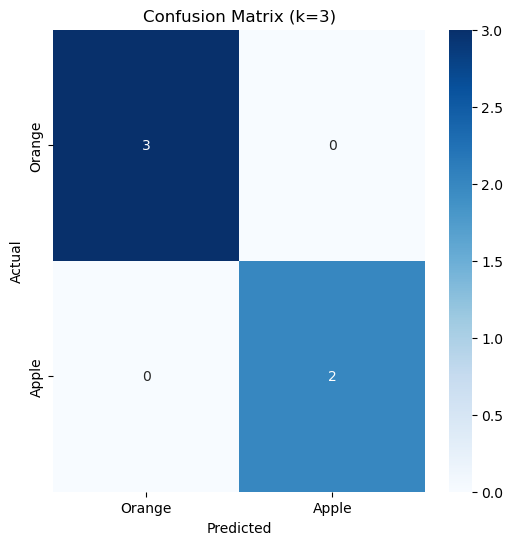

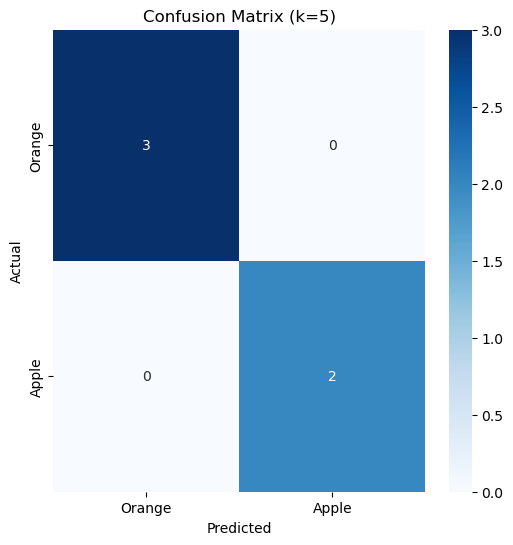

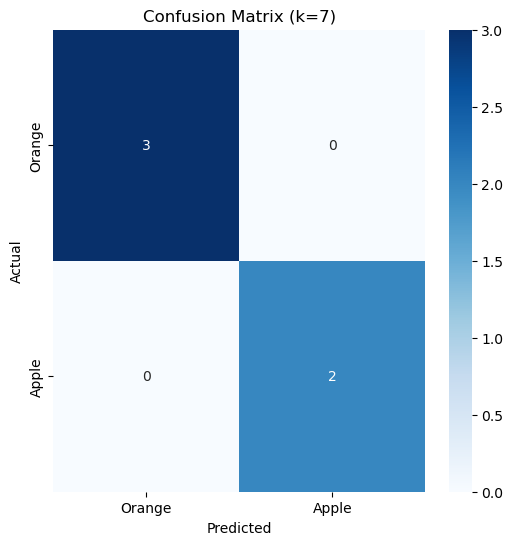

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

k_values = [3, 5, 7]

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)

    y_val_pred = knn_classifier.predict(X_val)
    cm = confusion_matrix(y_val, y_val_pred)
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["Orange", "Apple"], yticklabels=["Orange", "Apple"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix (k={k})")
    plt.show()

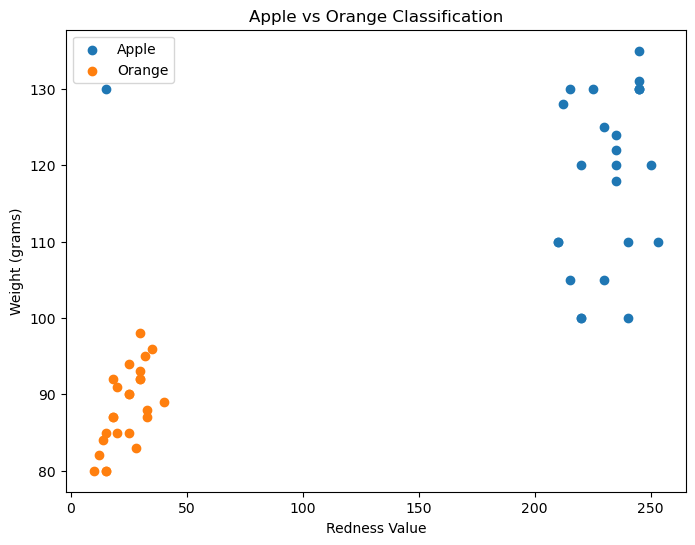

In [40]:
# Convert the data to a pandas DataFrame for visualization
df = pd.DataFrame(data, columns=['Redness', 'Weight', 'Fruit Type'])

# Plot the data samples
plt.figure(figsize=(8, 6))
for fruit_type in df['Fruit Type'].unique():
    subset = df[df['Fruit Type'] == fruit_type]
    plt.scatter(subset['Redness'], subset['Weight'], label=fruit_type)

plt.xlabel('Redness Value')
plt.ylabel('Weight (grams)')
plt.title('Apple vs Orange Classification')
plt.legend(['Apple', 'Orange']) ## plt.legend()--> Default 1,-1 for Apple and Orange
plt.show() 

# Question 2: 
Use the code provided for classifying the handwritten digits of the MNIST dataset. Read and understand the code.
Now,
(a) Modify the code so that it uses L1-distance instead of the default L2-distance (Euleadean).
(b) Find out the K that gives better performance.
(c) Report the Accuracy.
(d) Display results by showing the image, actual label, and predicted label. Find out a few samples where the predicted
label is incorrect

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Load MNIST dataset from sklearn
mnist = fetch_openml('mnist_784', parser='auto')
X = mnist.data 
y = mnist.target

In [4]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create a KNN classifier with k=5
knn_classifier = KNeighborsClassifier(n_neighbors=5, p=1) # p = 1: manhattan_distance (l1) and p = 2: euclidean_distance (l2) 

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy is: {accuracy*100}%")

# Analysis:
#K   accuracy
#k=2, 0.9561
#k=3, 0.966 --> Most Accurate
#k=4, 0.9625 
#k=5, 0.965
#k=7, 0.9561
#k=10, 0.958

Accuracy is: 96.5%


Picked Index is: 5354


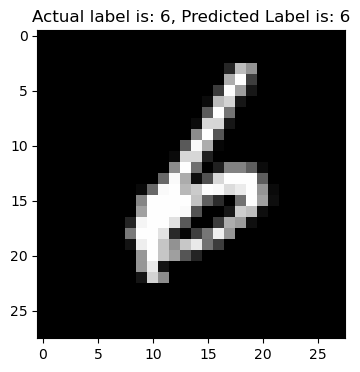

In [6]:
# To Display Images and Predicted Labels
import matplotlib.pyplot as plt

# Randomly pick an index
random_index = np.random.randint(0, len(X_test))
print(f"Picked Index is: {random_index}")

# Converting it into numpy arrays to read in matplotlib
X_test=np.array(X_test)
y_test=np.array(y_test)

# Get the image data and label
image = X_test[random_index,:].reshape(28,28) # Converting 784 pixels into 28*28
actual_label=y_test[random_index]
predicted_label = y_pred[random_index]

# Display the predcited image
plt.figure(figsize=(4, 4))
plt.imshow(image, cmap='gray')
plt.title(f"Actual label is: {actual_label}, Predicted Label is: {predicted_label}")
plt.show()

Index: 49


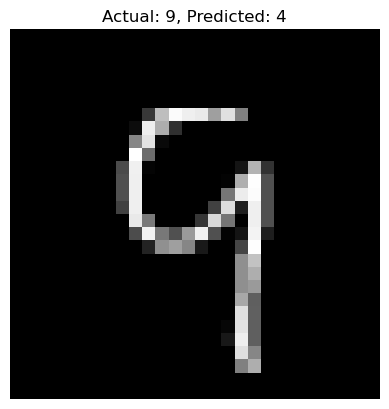

Index: 59


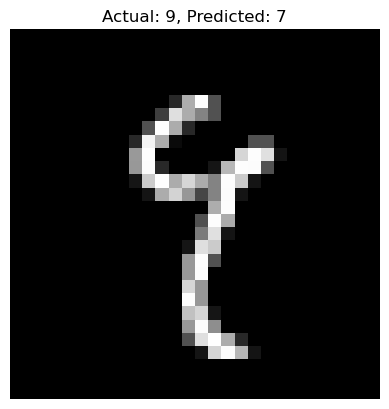

Index: 154


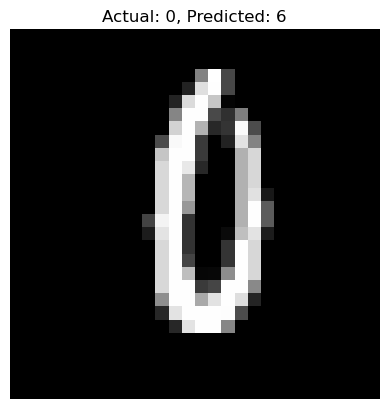

Index: 183


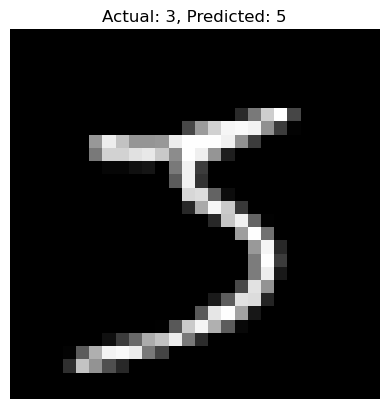

Index: 240


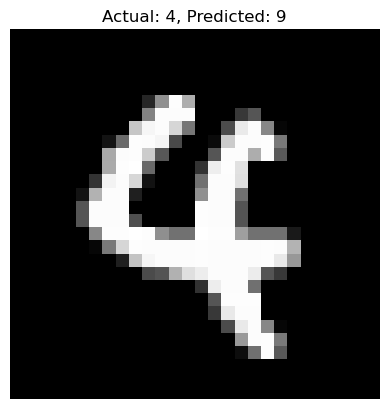

Index: 241


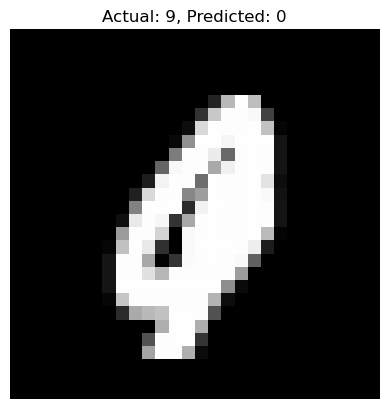

Index: 244


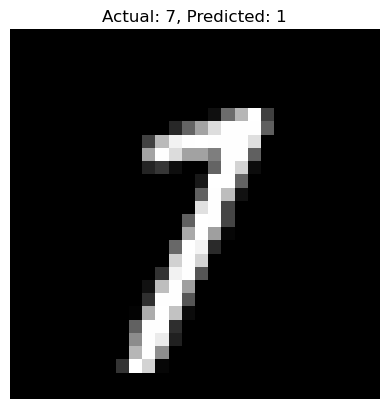

Index: 256


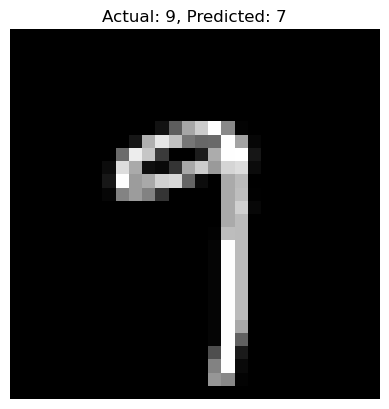

Index: 293


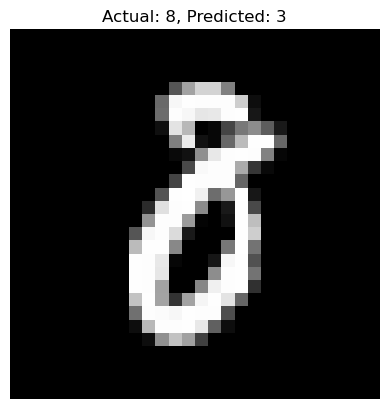

Index: 313


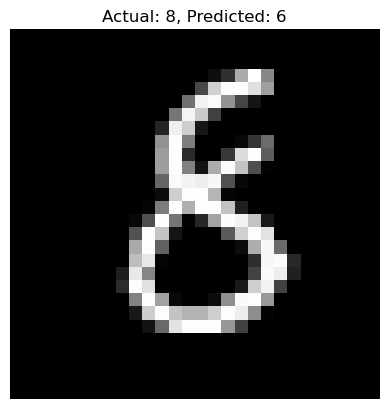

Index: 385


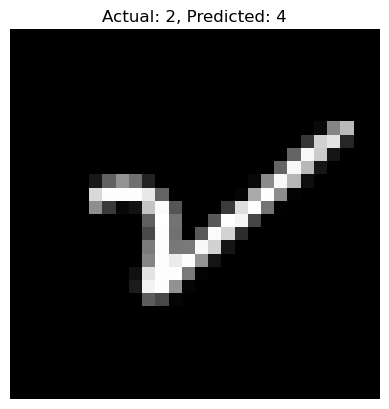

Index: 431


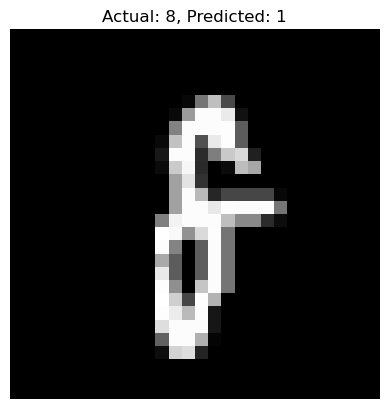

Index: 472


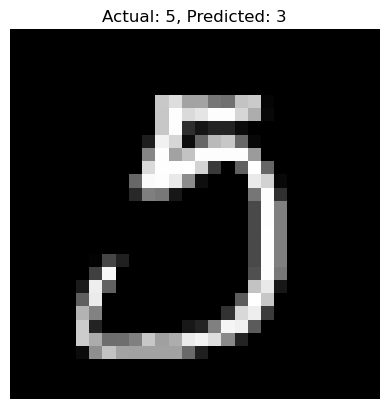

Index: 523


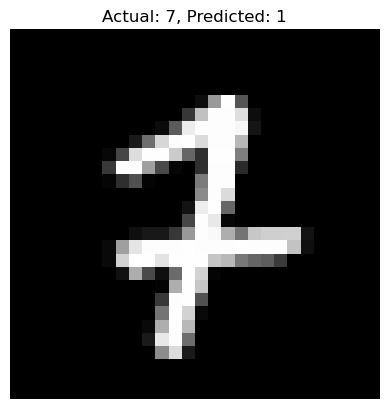

Index: 565


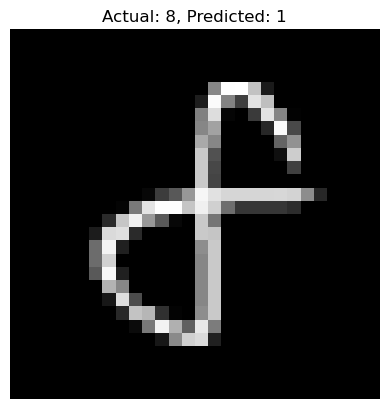

Index: 605


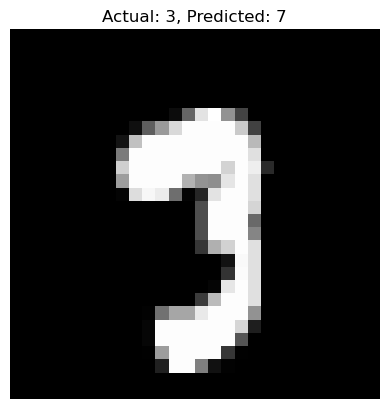

Index: 631


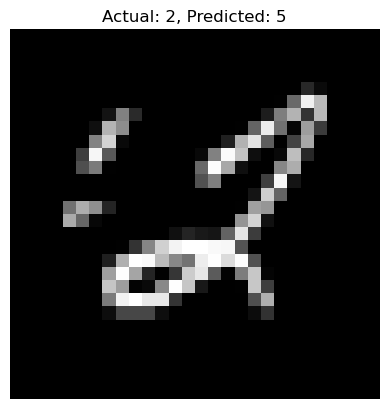

Index: 671


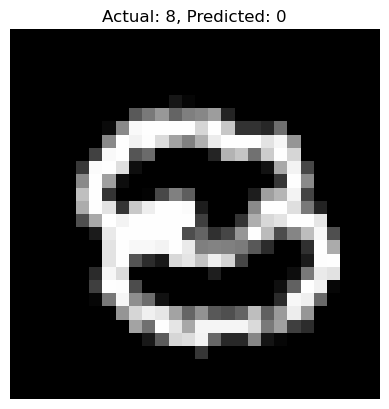

Index: 672


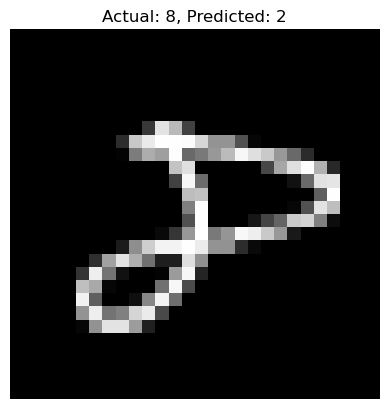

Index: 699


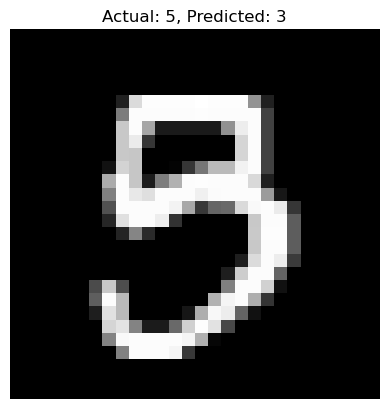

Index: 753


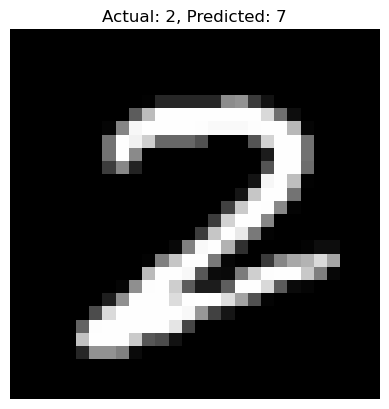

Index: 756


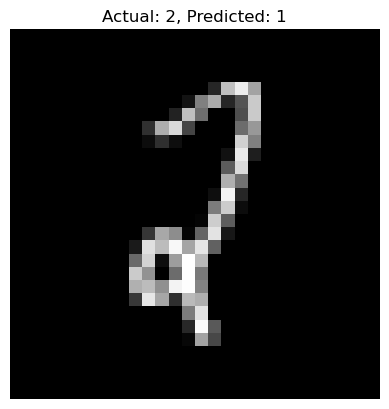

Index: 758


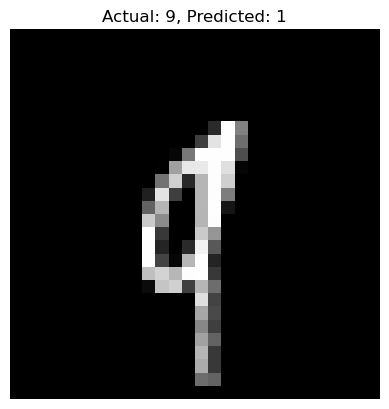

Index: 760


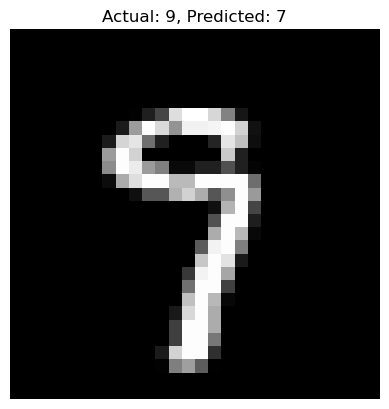

Index: 773


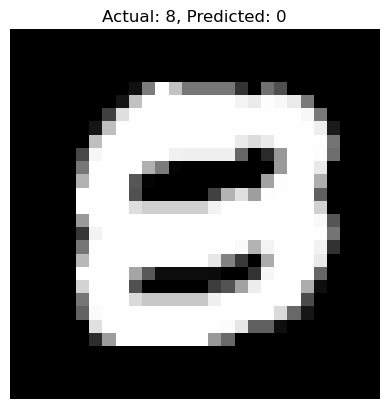

Index: 777


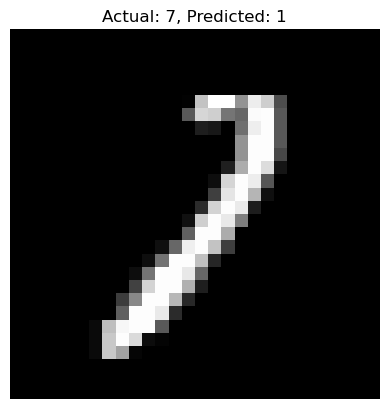

Index: 789


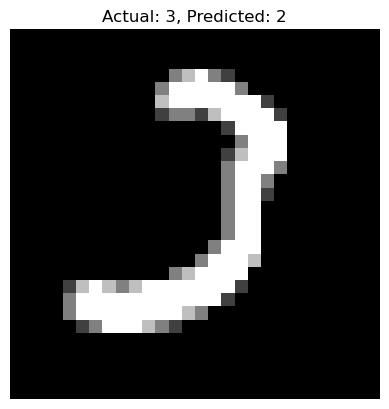

Index: 809


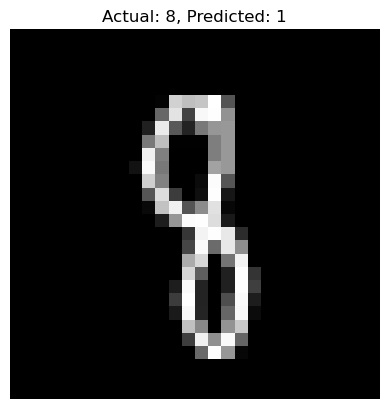

Index: 830


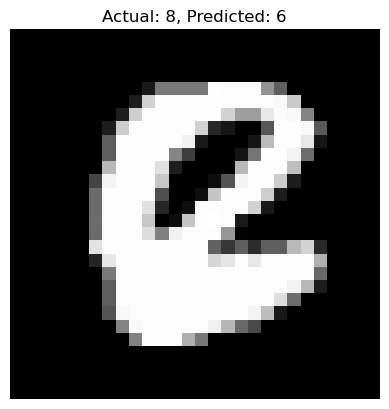

Index: 895


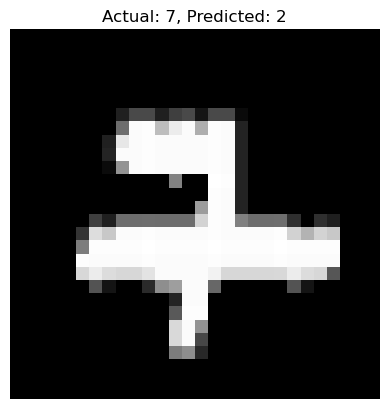

Index: 940


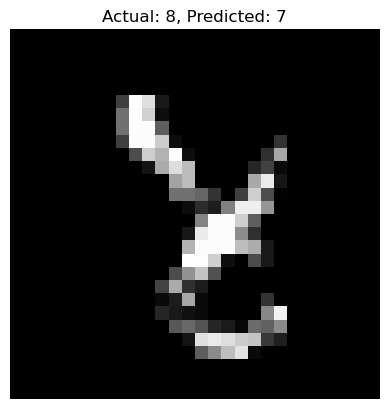

Index: 1007


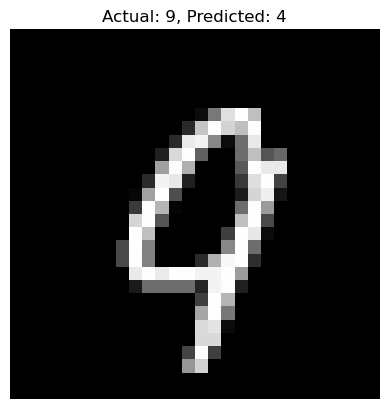

Index: 1026


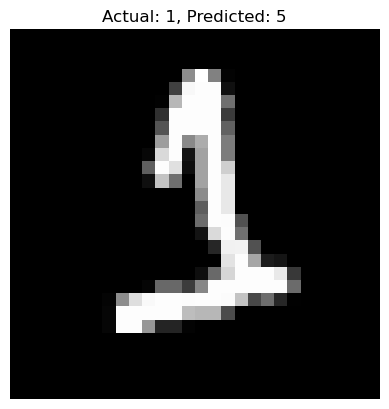

Index: 1049


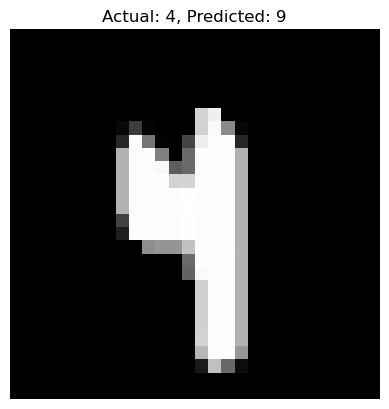

Index: 1106


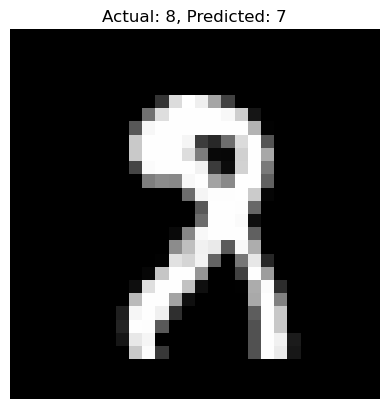

Index: 1163


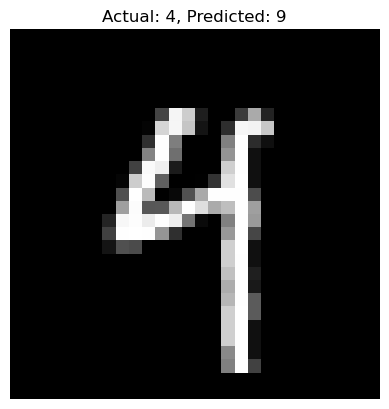

Index: 1194


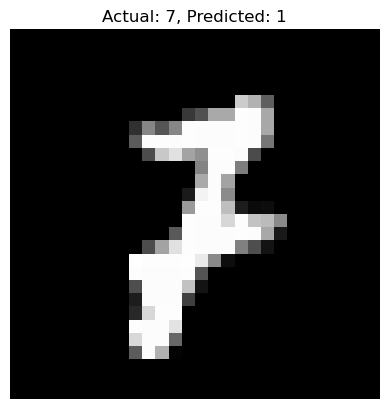

Index: 1251


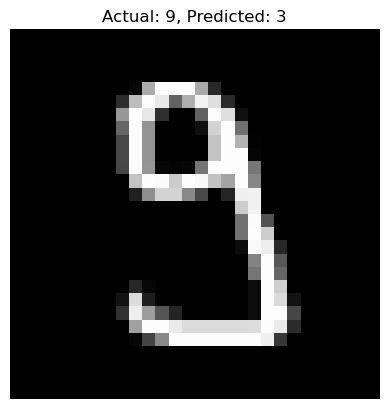

Index: 1291


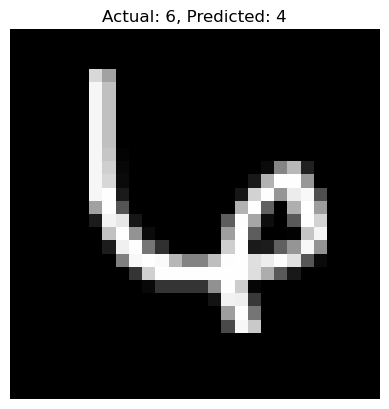

Index: 1297


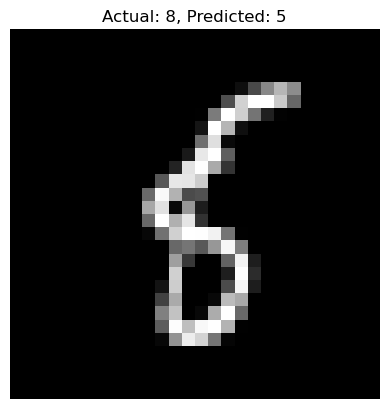

Index: 1342


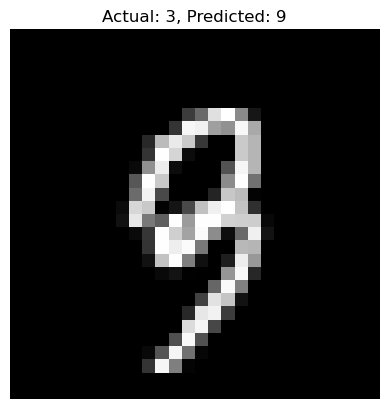

Index: 1351


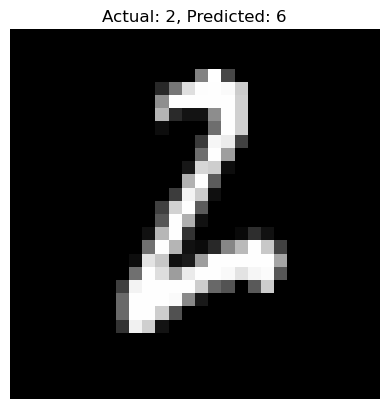

Index: 1364


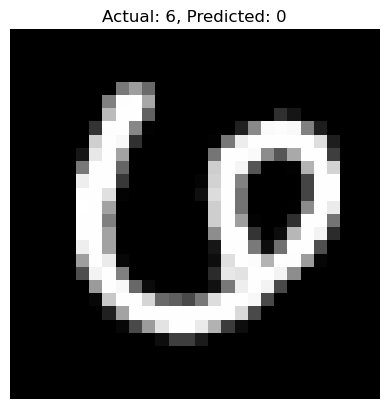

Index: 1480


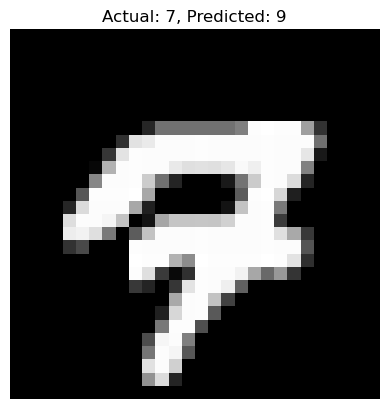

Index: 1487


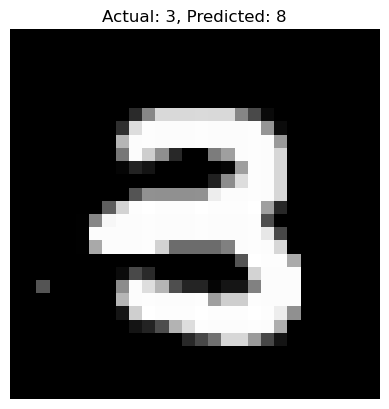

Index: 1516


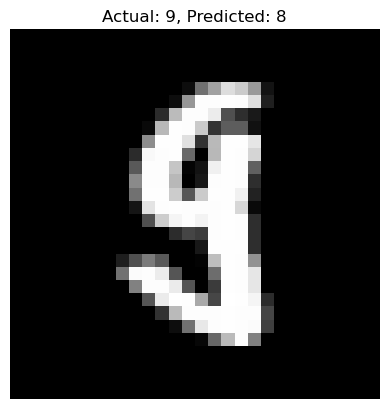

Index: 1528


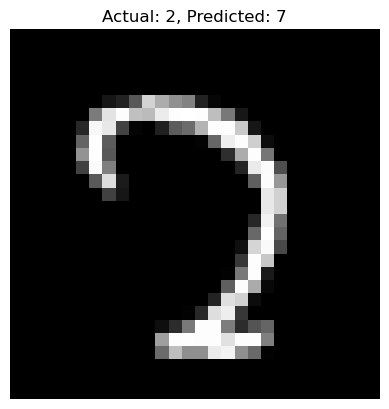

Index: 1546


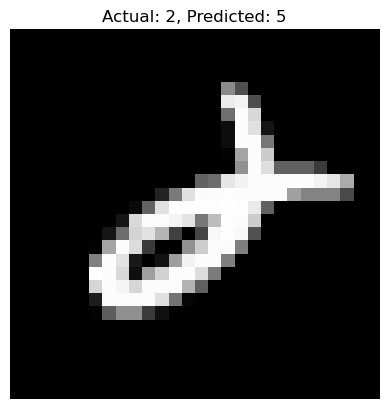

Index: 1650


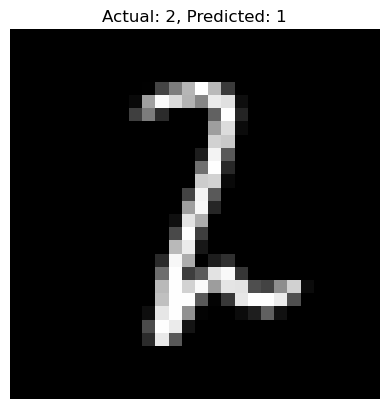

Index: 1658


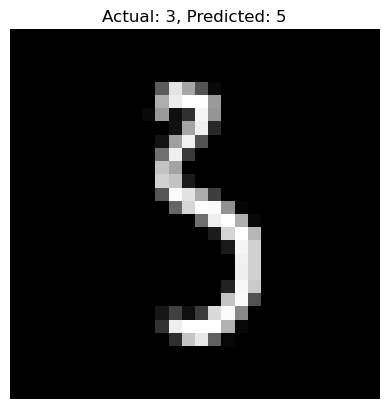

Index: 1670


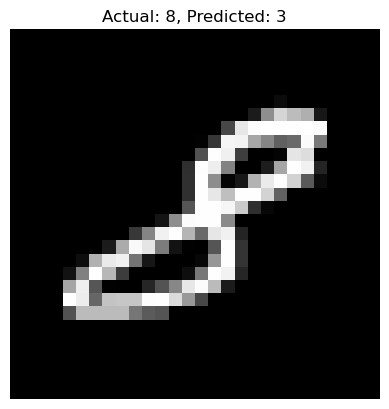

Index: 1707


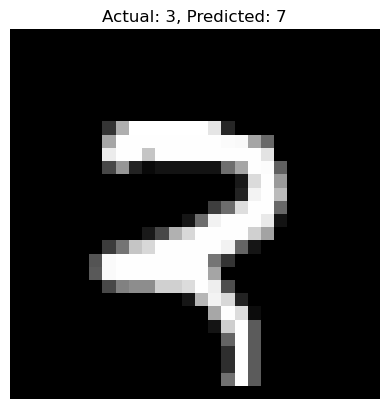

Index: 1714


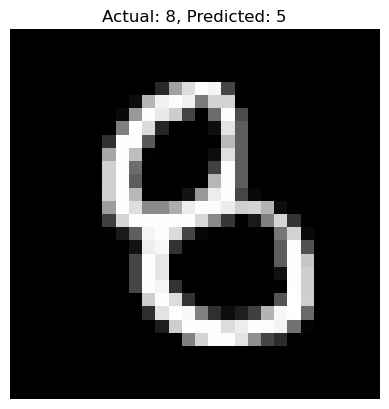

Index: 1716


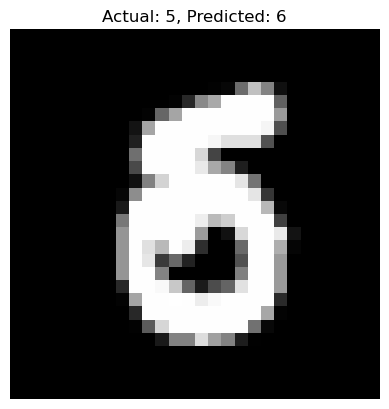

Index: 1718


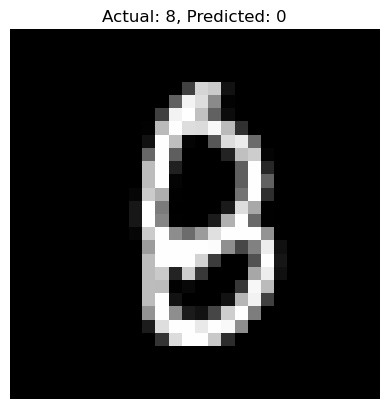

Index: 1744


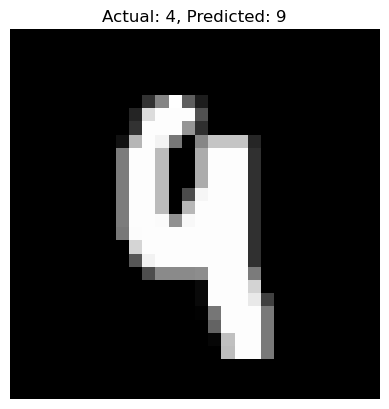

Index: 1790


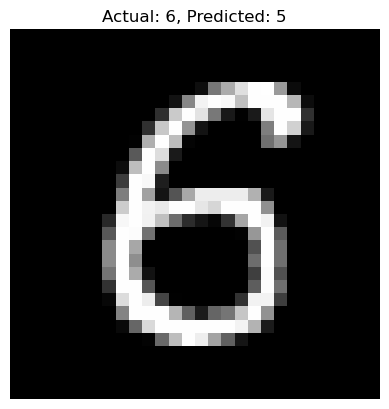

Index: 1826


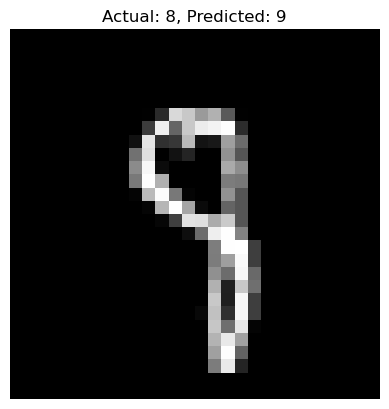

Index: 1861


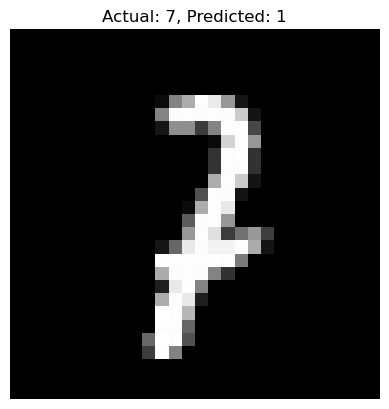

Index: 1896


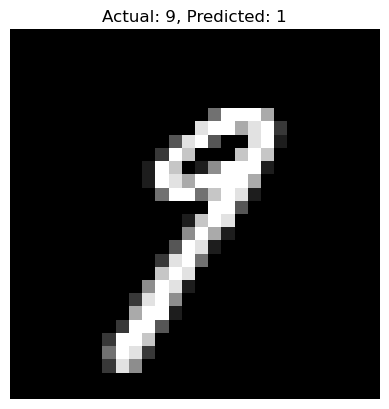

Index: 1918


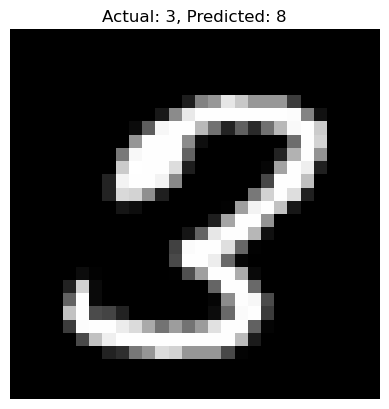

Index: 1924


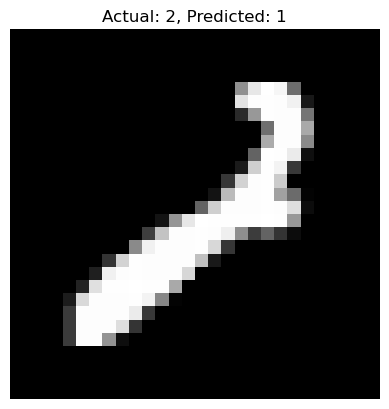

Index: 1965


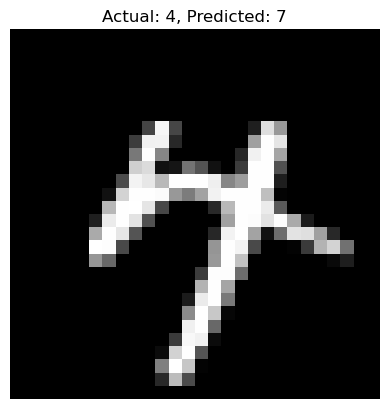

Index: 1987


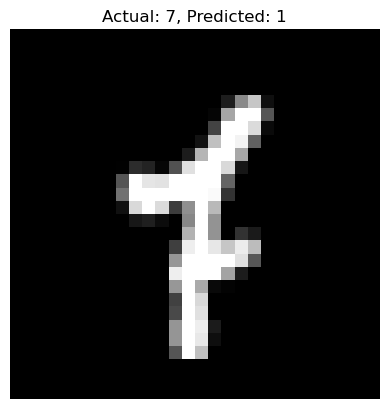

Index: 2023


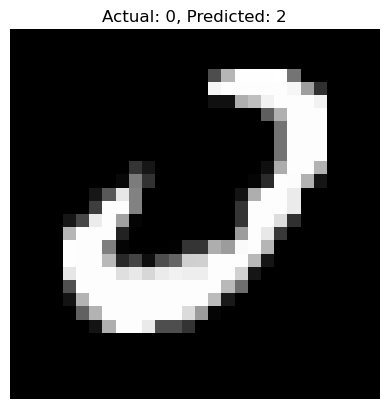

Index: 2025


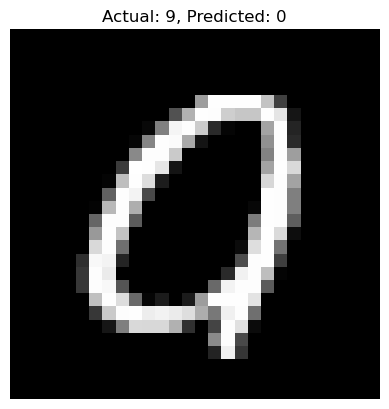

Index: 2030


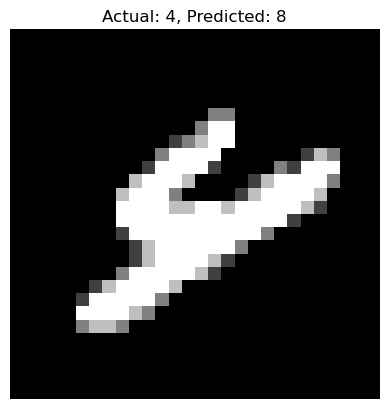

Index: 2044


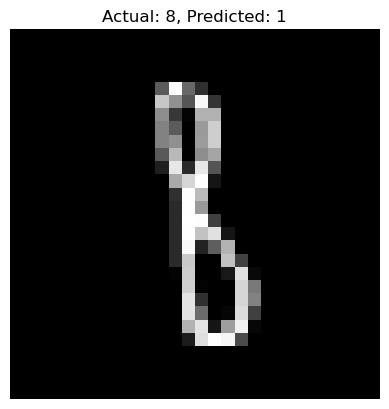

Index: 2067


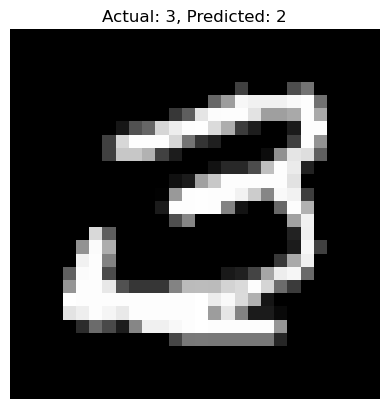

Index: 2077


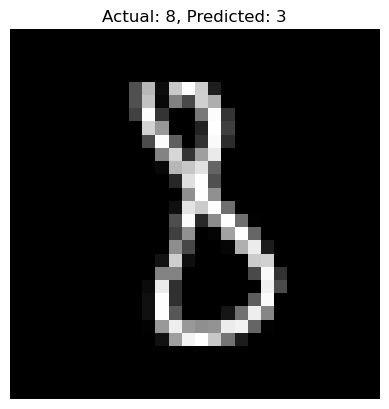

Index: 2092


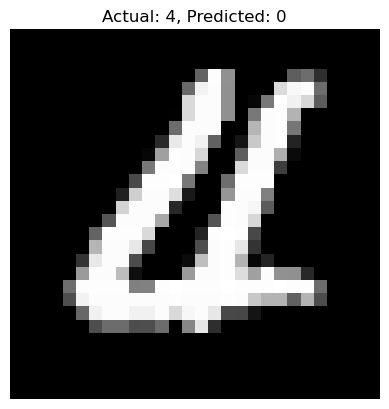

Index: 2108


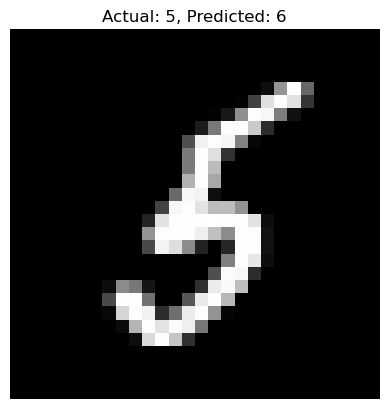

Index: 2123


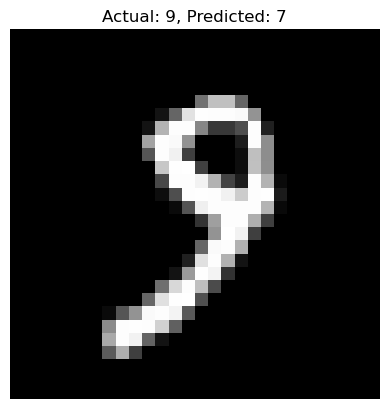

Index: 2139


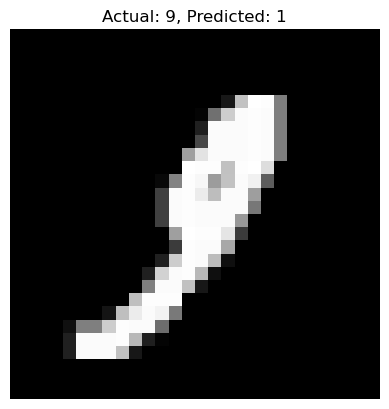

Index: 2141


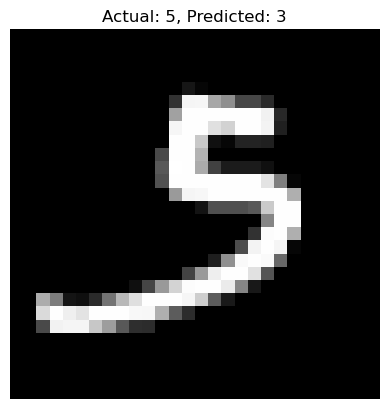

Index: 2160


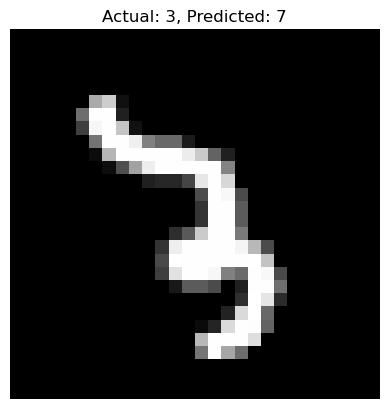

Index: 2201


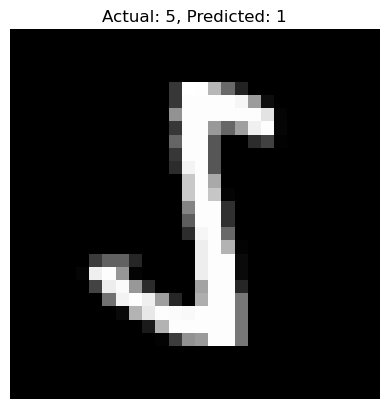

Index: 2209


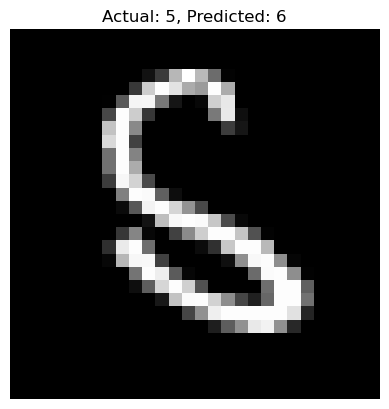

Index: 2299


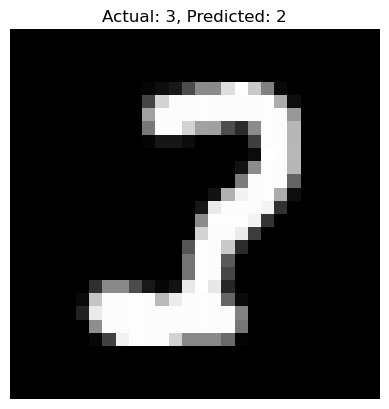

Index: 2317


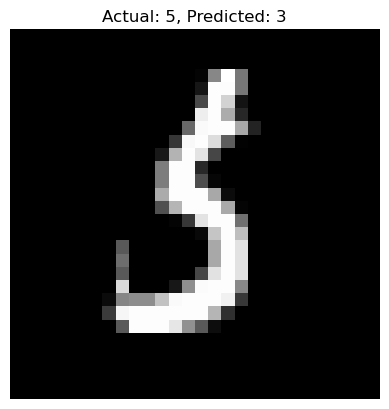

Index: 2327


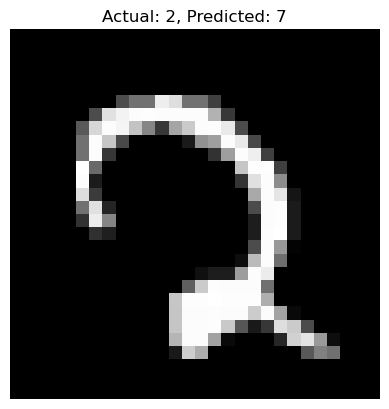

Index: 2338


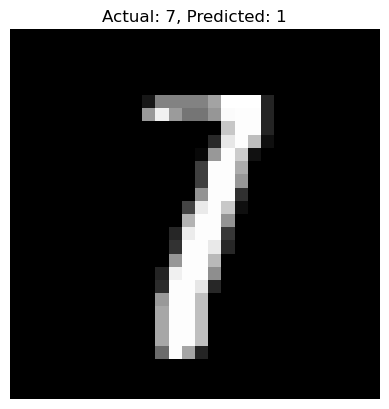

Index: 2360


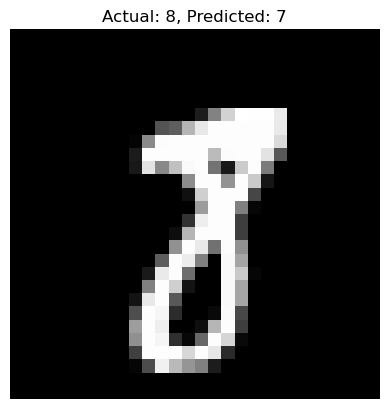

Index: 2396


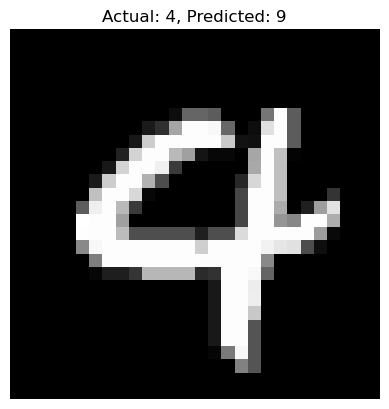

Index: 2420


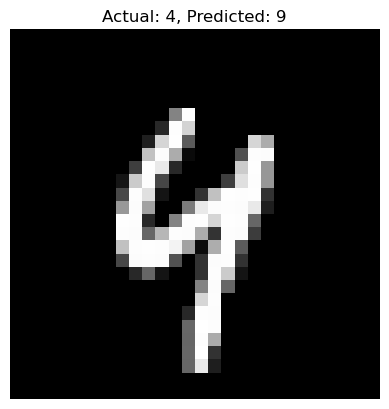

Index: 2467


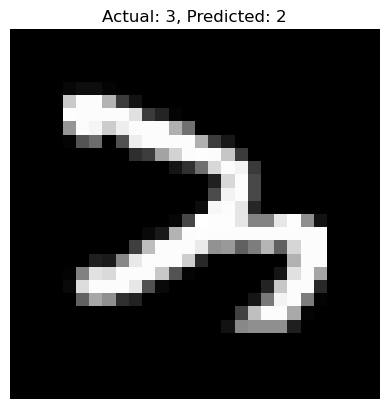

Index: 2481


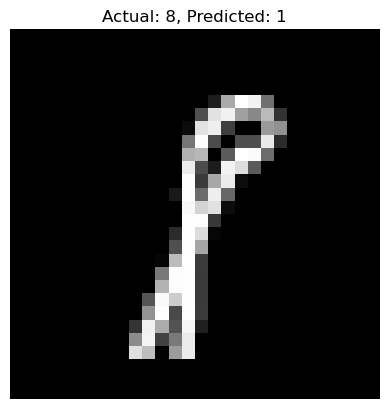

Index: 2482


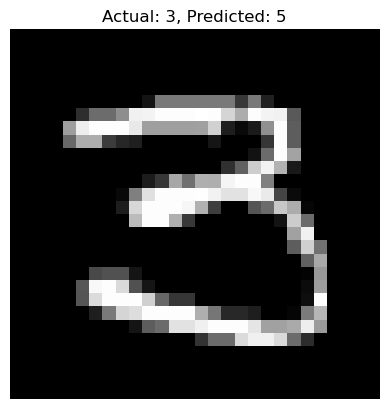

Index: 2511


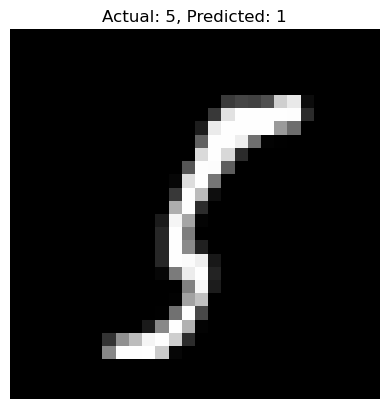

Index: 2551


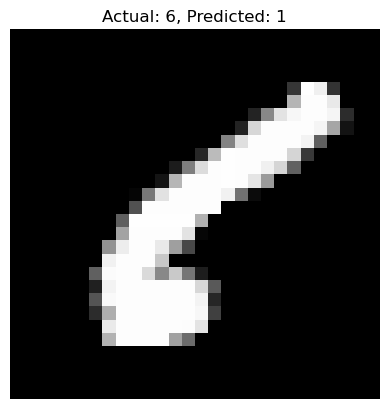

Index: 2602


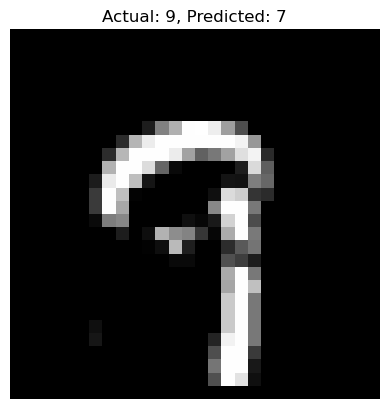

Index: 2607


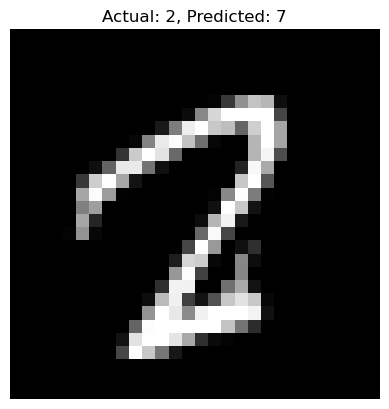

Index: 2617


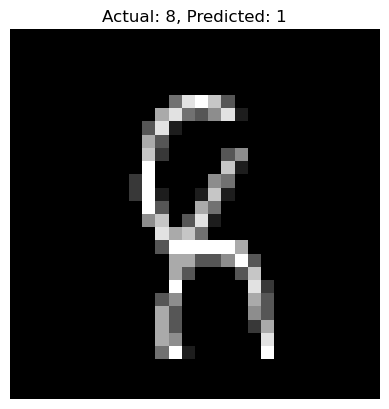

Index: 2622


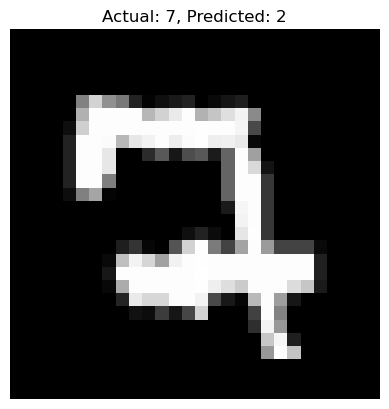

Index: 2651


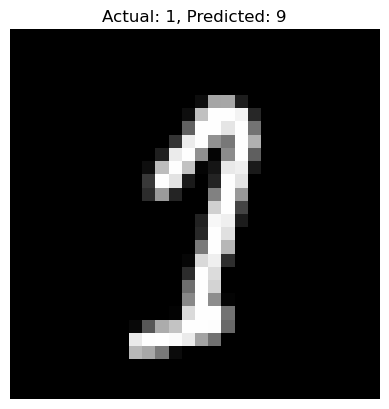

Index: 2666


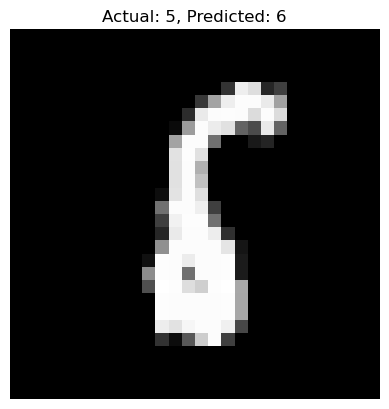

Index: 2689


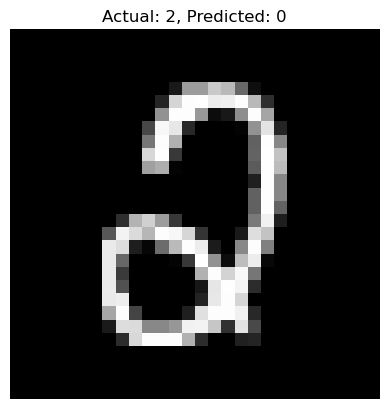

Index: 2709


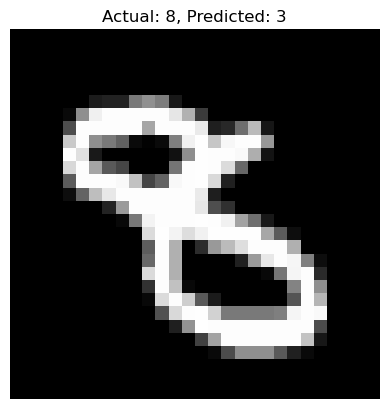

Index: 2724


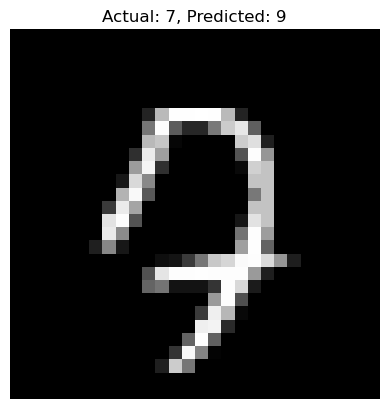

Index: 2757


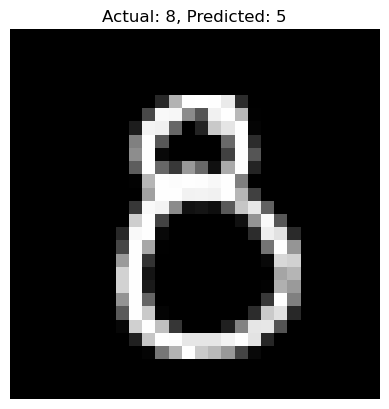

Therefore number of incorrect_samples are: 100


In [7]:
#Incorrect Samples
few_samples = 100
incorrect_samples = 0
a=0

for i in range(len(y_test)):
    if y_pred[i] != y_test[i]:
        print("Index:", i)
        image_data = X_test[i].reshape(28, 28)
        plt.imshow(image_data, cmap='gray')
        plt.title(f"Actual: {y_test[i]}, Predicted: {y_pred[i]}")
        plt.axis('off')
        plt.show()

        incorrect_samples = incorrect_samples + 1
      
        if incorrect_samples >= few_samples:
            break
print(f"Therefore number of incorrect_samples are: {incorrect_samples}")